<a href="https://colab.research.google.com/github/luckyetameta/MyGoCode/blob/main/Supervised_Machine_Learning_CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

Regression 

This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 
 
1. Explore this dataset using what you have learned in data preprocessing and data visualization 
2. Write a paragraph selecting the most important features (feature selection). 
3. Split your dataset into a training set and a testing set. 
4. Apply linear regression to your training set. 
5. Plot the linear regression. 
5. Measure the performance of linear regression using the testing set. 
6. Apply multiple-linear regression and compare it to the linear model. 
7. Apply polynomial regression and compare it to linear and multilinear regression. 
Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn import metrics 

In [10]:
import matplotlib.pyplot as plt

Importing dataset/ reading cvs file

In [11]:
house = pd.read_csv('/content/sample_data/house.csv') 

house


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
                          house.isnull().sum() # checking for missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
house['waterfront'].nunique() # getting unique values

2

In [14]:
rel_ft = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']]
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


**From the dataset we can see that:**

bedrooms is catigorical
bathrooms is catigorical     
sqft_living is numerical  
sqft_lot is numerical  
floors is catigorical          
waterfront is catigorical        
view  is catigorical          
condition is catigorical       
grade is catigorical     
sqft_above is numerical    
sqft_basement is numerical  
yr_built is numerical  
yr_renovated is catigorical    
lat is numerical         
long is numerical     
sqft_living15 is numerical  
sqft_lot15  is catigorical     
price is numerical       


Getting the catigory of dataset

In [15]:
#Splitting out data into train and test

In [16]:
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = house['price']

In [17]:
sc = StandardScaler()
trans = sc.fit_transform(x)

In [18]:
trans

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [19]:
#Transforming our data using standardscaler method

In [20]:
sc = StandardScaler()
trans = sc.fit_transform(rel_ft)

In [21]:
trans_df = pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,-0.381588


In [22]:
x = trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

**Building model - Multiple linear regression model**

In [24]:
# Building model - Multiple linear regression model

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)

target

array([ 0.58044966, -0.61730192, -0.43151871, ...,  2.54011245,
       -0.23457062, -0.13610903])

In [25]:
print(mean_squared_error(y_test, target))

print(metrics.r2_score(y_test, target))

0.27763348921342546
0.7144836381675124


**Simple Linear Regression**

In [26]:
#using sqft_living to predict price


x_sqft = trans_df.iloc[:, 2]
y_sqft = trans_df.iloc[:, -1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_sqft, y_sqft, test_size = .2)

In [28]:
x_train = np.array(x_train).reshape(-1,1) 
x_test = np.array(x_test).reshape(-1,1)

In [29]:
#Building model -Simple linear regression model betwen sqft_living

linear_model = LinearRegression()

linear_model.fit(x_train, y_train) 

target = linear_model.predict(x_test)


In [30]:
print('MSE:', mean_squared_error(y_test, target))

print('R squared:', metrics.r2_score(y_test, target))

MSE: 0.4853045714695266
R squared: 0.5024242695138096


In [31]:
#using floors to predict price

x_floors = trans_df.iloc[:, 4]
y_floors = trans_df.iloc[:, -1]

In [32]:
x_train_floors, x_test_floors, y_train_floors, y_test_floors = train_test_split(x_floors, y_floors, test_size = .2)

In [33]:
x_train_floors = np.array(x_train_floors).reshape(-1,1) 
x_test_floors = np.array(x_test_floors).reshape(-1,1)

In [34]:
#Building model -Simple linear regression model between floors and price

linear_model = LinearRegression()

linear_model.fit(x_train_floors, y_train_floors) 

target = linear_model.predict(x_test_floors)

In [35]:
print('MSE:', mean_squared_error(y_test_floors, target))

print('R squared:', metrics.r2_score(y_test_floors, target))

MSE: 0.9379730148007016
R squared: 0.06083923709852834


In [36]:
#using sqft_above to predict price

x_sqft_above = trans_df.iloc[:, 9]
y_sqft_above = trans_df.iloc[:, -1]

In [37]:
x_train_sqft_above, x_test_sqft_above, y_train_sqft_above, y_test_sqft_above = train_test_split(x_sqft_above, y_sqft_above, test_size = .2)

In [38]:
x_train_sqft_above = np.array(x_train_sqft_above).reshape(-1,1) 
x_test_sqft_above = np.array(x_test_sqft_above).reshape(-1,1)

In [39]:
#Building model -Simple linear regression model between sqft_above and price

linear_model = LinearRegression()

linear_model.fit(x_train_sqft_above, y_train_sqft_above) 

target = linear_model.predict(x_test_sqft_above)

In [40]:
print('MSE:', mean_squared_error(y_test_sqft_above, target))

print('R squared:', metrics.r2_score(y_test_sqft_above, target))

MSE: 0.6261087769964626
R squared: 0.3703186452097852


In [110]:
#using sqft_lot to predict price

x_lot = trans_df.iloc[:, 3]
y_lot = trans_df.iloc[:, -1]

In [111]:
x_train_lot, x_test_lot, y_train_lot, y_test_lot = train_test_split(x_lot, y_lot, test_size = .2)

In [112]:
x_train_lot = np.array(x_train_lot).reshape(-1,1) 
x_test_lot = np.array(x_test_lot).reshape(-1,1)

In [113]:
#Building model -Simple linear regression model between sqft_lot and price

linear_model = LinearRegression()

linear_model.fit(x_train_lot, y_train_lot) 

target = linear_model.predict(x_test_lot)

In [114]:
print('MSE:', mean_squared_error(y_test_lot, target))

print('R squared:', metrics.r2_score(y_test_lot, target))

MSE: 1.0123715969963085
R squared: 0.010303356980170264


**Polynomial Regression**

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [116]:
x_poly_lot = poly.fit_transform(x_test_lot)
linear_reg = LinearRegression()
linear_reg.fit(x_poly_lot, y_test_lot)

LinearRegression()

In [117]:
print('Intercept constant for our linear model:', linear_model.intercept_)
print('coefficient of x for our linear model:', linear_model.coef_)

Intercept constant for our linear model: -7.319469627286169e-05
coefficient of x for our linear model: [0.08915247]


In [119]:
y_pred_lot = linear_model.predict(x_test_lot)
y_pred_lot

array([-0.01722149, -0.02209673,  0.01661462, ..., -0.00596646,
       -0.01698042, -0.0169632 ])

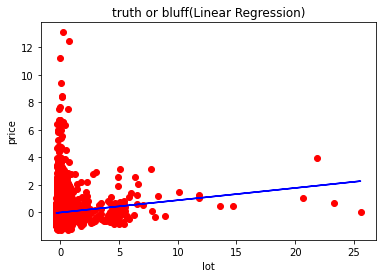

In [120]:
plt.scatter(x_test_lot,y_test_lot, color = 'red')
plt.plot(x_test_lot, y_pred_lot,color =  'blue')
plt.title('truth or bluff(Linear Regression)')
plt.xlabel('lot')
plt.ylabel('price')
plt.show()

In [121]:
y_poly_pred_lot = linear_reg.predict(x_poly_lot)

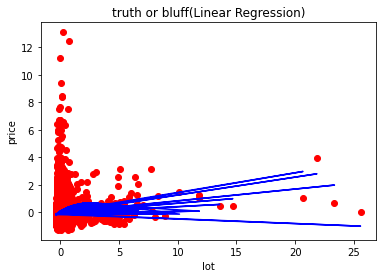

In [122]:
plt.scatter(x_test_lot,y_test_lot, color = 'red')
plt.plot(x_test_lot, y_poly_pred_lot,color =  'blue')
plt.title('truth or bluff(Linear Regression)')
plt.xlabel('lot')
plt.ylabel('price')
plt.show()

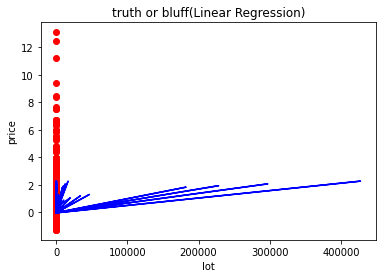

In [123]:
plt.scatter(x_test_lot,y_test_lot, color = 'red')
plt.plot(x_poly_lot, y_pred_lot,color =  'blue')
plt.title('truth or bluff(Linear Regression)')
plt.xlabel('lot')
plt.ylabel('price')
plt.show()

From the scatterplot, we can see that polynomial regression cannot be used to show the relationship between sqft_lot and price.

In [101]:
x_sqft_above = trans_df.iloc[:,9]
y_sqft_above = trans_df.iloc[:,-1]
x_train_sqft_above, x_test_sqft_above, y_train_sqft_above, y_test_sqft_above = train_test_split(x_sqft_above, y_sqft_above, test_size =.2)
x_train_sqft_above = np.array(x_train_sqft_above).reshape(-1,1)
x_test_sqft_above = np.array(x_test_sqft_above).reshape(-1,1)


sqft_above = LinearRegression()
sqft_above.fit(x_train_sqft_above, y_train_sqft_above)

target = sqft_above.predict(x_test_sqft_above)

print('MSE', mean_squared_error(y_test_sqft_above, target))
print('R squared:', metrics.r2_score(y_test_sqft_above, target))

MSE 0.6436779890360677
R squared: 0.35516609015833334


In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [103]:
x_poly = poly.fit_transform(x_test_sqft_above)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_test_sqft_above)

LinearRegression()

In [104]:
print('Intercept constant for our linear model:', sqft_above.intercept_)
print('Coefficient of x for our linear model:', sqft_above.coef_)

Intercept constant for our linear model: -0.0029180499914418776
Coefficient of x for our linear model: [0.60784078]


In [105]:
y_predict = sqft_above.predict(x_test_sqft_above)
y_predict

array([ 0.13039109, -0.14854546, -0.06780067, ...,  1.03326467,
       -0.36141809,  0.26985937])

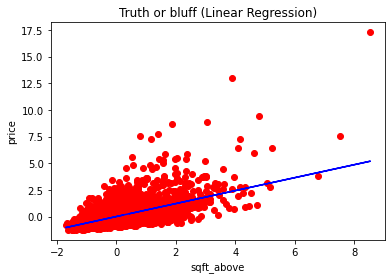

In [106]:
plt.scatter(x_test_sqft_above, y_test_sqft_above, color = 'red')
plt.plot(x_test_sqft_above, y_predict, color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

In [107]:
y_pred_poly = lin_reg.predict(x_poly)

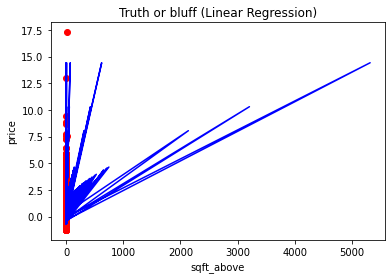

In [108]:
plt.scatter(x_test_sqft_above, y_test_sqft_above, color = 'red')
plt.plot(x_poly, y_pred_poly, color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

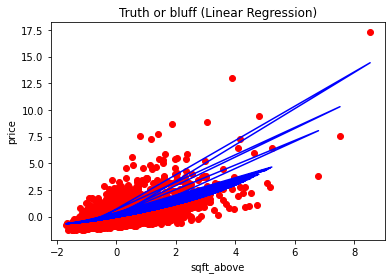

In [109]:
plt.scatter(x_test_sqft_above, y_test_sqft_above, color = 'red')
plt.plot(x_test_sqft_above, y_pred_poly, color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

**Polynomial regression is also unable to show the relationship between sqft_above and price.**